Building a GPT

Companion notebook to the [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT.

## learn about bigram

In [1]:
# download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-01-26 11:36:41--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2023-01-26 11:36:41 (33.4 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# 下载斗破苍穹语料库
!wget https://raw.githubusercontent.com/GaoPeng97/transformer-xl-chinese/master/data/doupo/train.txt

--2023-01-26 11:36:42--  https://raw.githubusercontent.com/GaoPeng97/transformer-xl-chinese/master/data/doupo/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16119225 (15M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]  15.37M  --.-KB/s    in 0.1s    

2023-01-26 11:36:43 (150 MB/s) - ‘train.txt’ saved [16119225/16119225]



In [3]:
!wget https://raw.githubusercontent.com/GaoPeng97/transformer-xl-chinese/master/data/doupo/valid.txt

--2023-01-26 11:36:44--  https://raw.githubusercontent.com/GaoPeng97/transformer-xl-chinese/master/data/doupo/valid.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4722 (4.6K) [text/plain]
Saving to: ‘valid.txt’

valid.txt           100%[===================>]   4.61K  --.-KB/s    in 0s      

2023-01-26 11:36:45 (22.3 MB/s) - ‘valid.txt’ saved [4722/4722]



In [4]:
!head -n 10 train.txt

《斗破苍穹》天蚕土豆

严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。
在线阅读：http://www.shuyaya.com/read/18/
--------------------------------------------------

第一章 陨落的天才

    “斗之力，三段！”



In [5]:
!head -n 10 valid.txt


    半年时间，眨眼便过。

    中州，天府联盟总部，一座高耸的石塔上。

    在石塔周围，有着无数的强者悬浮，他们的目光，皆是泛着狂热的望着石塔顶部，那里，一道黑衫青年安静的盘坐着，这是他们十年之内，第一次见到那传说中的人物。

    炎帝，萧炎

    “你认为萧炎所说，究竟是真还是假？”烛坤望着萧炎，偏头对着一旁的古元道。


In [6]:
# read it in to inspect it
# path = './input.txt'
path = './train.txt'
# path = './valid.txt'
with open(path, 'r') as f:
    text = f.read()

In [7]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  5676753


In [8]:
# let's look at the first 1000 characters
print(text[190:1000])



第一章 陨落的天才

    “斗之力，三段！”

    望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字，少年面无表情，唇角有着一抹自嘲，紧握的手掌，因为大力，而导致略微尖锐的指甲深深的刺进了掌心之中，带来一阵阵钻心的疼痛…

    “萧炎，斗之力，三段！级别：低级！”测验魔石碑之旁，一位中年男子，看了一眼碑上所显示出来的信息，语气漠然的将之公布了出来…

    中年男子话刚刚脱口，便是不出意外的在人头汹涌的广场上带起了一阵嘲讽的骚动。

    “三段？嘿嘿，果然不出我所料，这个“天才”这一年又是在原地踏步！”

    “哎，这废物真是把家族的脸都给丢光了。”

    “要不是族长是他的父亲，这种废物，早就被驱赶出家族，任其自生自灭了，哪还有机会待在家族中白吃白喝。”

    “唉，昔年那名闻乌坦城的天才少年，如今怎么落魄成这般模样了啊？”

    “谁知道呢，或许做了什么亏心事，惹得神灵降怒了吧…”

    周围传来的不屑嘲笑以及惋惜轻叹，落在那如木桩待在原地的少年耳中，恍如一根根利刺狠狠的扎在心脏一般，让得少年呼吸微微急促。

    少年缓缓抬起头来，露出一张有些清秀的稚嫩脸庞，漆黑的眸子木然的在周围那些嘲讽的同龄人身上扫过，少年嘴角的自嘲，似乎变得更加苦涩了。

    “这些人，都如此刻薄势力吗？或许是因为三年前他们曾经在自己面前露出过最谦卑的笑容，所以，如今想要讨还回去吧…”苦涩的一笑，萧炎落寞的转身，安静的回到了队伍的最后一排，孤单的身影，与周围的世界，有些格格不入。

    “下一个，萧媚！”

    听着测验人的喊声，一名少女快速的人群中跑出，少女刚刚出场，附近的议论声便是小了许多，一双双略微火热的目光，牢牢的锁定着少女的脸颊…

    少女年龄不过十四左右，虽然并算不上绝色，不过那张稚气未脱的小脸，却是蕴含着淡淡的妩媚，清纯与妩媚，矛盾的集合，让


In [9]:
text = text[190:]

In [10]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars[:1000]))
print(vocab_size)

	
 !"#$%&()*+,-./0123456789:;<=>?@ABCDFGHIJKLMNOPQSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~§·àáèò÷āǎΟακχωМСФабор—―‖‘’“”…″※℃←↑→↓∑√∥∫∽≠≤≥≦≧≮⊙①⑥⑴⑸⑹⒉⒌⒛┅■▲◆○●★☆♀♂　、。《》「」『』【】〗のロㄧ一丁七丄丅丆万丈三上下不与丐丑专且世丘丙业丛东丝丢两严丧丨个丫中丰串临丵丸丹为主丽举丿乃久乇么义之乌乍乎乏乐乒乓乔乖乘乙乜九乞也习乡书买乱乳乾了予争事二亍于亏亐云互亓五井亘亚些亡亢交亦产亨亩享京亭亮亲亳亵人亾亿什仁仂仅仆仇今介仍从仑仒仓仔他仗付仙仝仞代令以仪们仰仲件价任份仿企伊伍伎伏伐休众优伙会伝伞伟传伤伦伪伫伯估伱伴伶伸伺似佃但位低住佐佑体何佘余佚佛作佝你佣佩佬佯佰佳佴佼佾使侃侄侈侉例侍侔供依侠侣侥侦侧侩侪侮侯侵便促俊俎俏俐俑俗俘保俟信俦俨俩俪俭修俯俱俸俺俾倍倏倒倔倘候倚倜借倡倦倨倩倪倬倭债值倾假偌偎偏做停健偶偷偻偾偿傀傅傈傍傥储傩催傲傻像僖僧僵僻儆儒儡儿兀允元兄充兆先光克免兑兔兖党兜兢入全八公六兮兰共关兴兵其具典养兼兽冀内冈冉册再冒冕写军农冠冤冥冬冰冲决况冶冷冻冽净凄准凉凋凌减凑凛凝几凡凤凭凯凰凳凶凸凹出击凼函凿刀刁刃分切刊刎刑划列刘则刚创初删判刨利别刭刮到制刷券刹刺刻刽剁剂削剌前剐剑剔剖剥剧剩剪副割剽剿劁劈力劝办功加务劢劣动助努劫励劲劳势勃勇勉勋勐勒勖募勤勲勺勾勿匀包匆匍匐匕化北匙匠匡匣匪匮匹区医匾匿十千升午卉半华协卑卒卓单卖南博卜卟占卡卢卦卧卫卯印危即却卵卷卸卿厂厄厅历厉压厌厕厘厚原厢厥厨厩厮去县参又叉及友双反发叔取受变叙叛叟叠口古句另叨只叫召叭叮可台叱史右叶号司叹叼叽吁吃各吆合吉吊同名后吏吐向吓吗君吝吞吟吠否吧吩含听吭启吱吴吵吸吹吻吼吾呀呃呆呈告呐呕呗员呛呜呢呤呦周呯呱呲味呵呸呻呼命咀咂咄咆咋和咎咐咒咔咕咖咙咚咛咣咤咦咧咩咪咫咬咯咱咳咸咻咽咿哀品哄哆哇哈哉响哎哐哑哒哕哗哙哚哜哝哞哟哥哦哧哨哩哪哭哮哲哺哼哽唆唇唉唏唐唔唠唢唤唧唬售唯唰唱唳唷唾啃啄商啊啐啡啤啥啦啧啪啬啰啵啸啼喀喁喂喃善喇喈喉喊喋喏喔喘喜喝喟喧喳喵喷喹喻喽嗅嗍嗒嗓嗔嗖嗜嗝嗡嗤嗥嗦嗨嗬嗯嗷嗽嘀嘁嘈嘉嘎嘘嘛嘞嘟嘣嘤嘭嘱嘲嘴嘶嘹嘻嘿噌噎噔噗噙噜噢噤器噩噪噬噶噼嚅嚎嚏嚓嚣嚷嚼囊囓囔囗囚四回因囡团囤囦囫园困囱围囹固国图圃圆圈圉圝土圣在圭地圹场圾址均坊坍坎坏坐坑块

In [11]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# print(encode("hii there"))
# print(decode(encode("hii there")))
print(encode("萧炎，斗之力，三段！级别：低级！"))
print(decode(encode("萧炎，斗之力，三段！级别：低级！")))

[3611, 2561, 4745, 1949, 223, 587, 4745, 183, 2286, 4741, 3196, 557, 4753, 342, 3196, 4741]
萧炎，斗之力，三段！级别：低级！


In [12]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100]) # the 100 characters we looked at earier will to the GPT look like this

torch.Size([5676563]) torch.int64
tensor([   1,    1, 3107,  175, 3091,    2, 4435, 3615, 2835, 1076, 1691,    1,
           1,    2,    2,    2,    2,  120, 1949,  223,  587, 4745,  183, 2286,
        4741,  121,    1,    1,    2,    2,    2,    2, 2060, 2887, 2405, 4607,
        4642, 2930, 2973,  184, 4494, 4384,  273, 1499, 2752, 3459, 2055,  262,
         565, 2886, 2835,  258,  204, 1075, 1200, 4745, 1281, 1409, 4494, 1972,
        3780, 1598, 4745,  844, 3845, 2055, 2887,  175, 1740, 3456,  930, 4745,
        3183, 1856, 2835, 1690, 1832, 4745,  964,  213, 1075,  587, 4745, 3336,
        1273, 3460, 2775, 1505, 1283, 4343, 2835, 1784, 2761, 2456, 2456, 2835,
         565, 4149,  246, 1832])


In [13]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [14]:
block_size = 8
train_data[:block_size+1]

tensor([   1,    1, 3107,  175, 3091,    2, 4435, 3615, 2835])

In [15]:
x = train_data[:block_size]     # idx: 0->8
y = train_data[1:block_size+1]  # idx: 1->9
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([1]) the target: 1
when input is tensor([1, 1]) the target: 3107
when input is tensor([   1,    1, 3107]) the target: 175
when input is tensor([   1,    1, 3107,  175]) the target: 3091
when input is tensor([   1,    1, 3107,  175, 3091]) the target: 2
when input is tensor([   1,    1, 3107,  175, 3091,    2]) the target: 4435
when input is tensor([   1,    1, 3107,  175, 3091,    2, 4435]) the target: 3615
when input is tensor([   1,    1, 3107,  175, 3091,    2, 4435, 3615]) the target: 2835


In [16]:
help(torch.randint)

Help on built-in function randint:

randint(...)
    randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with random integers generated uniformly
    between :attr:`low` (inclusive) and :attr:`high` (exclusive).
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    .. note::
        With the global dtype default (``torch.float32``), this function returns
        a tensor with dtype ``torch.int64``.
    
    Args:
        low (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
        high (int): One above the highest integer to be drawn from the distribution.
        size (tuple): a tuple defining the shape of the output tensor.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output tensor.
       

In [17]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[   1,    1,    2,    2,    2,    2,  183, 1076],
        [2600, 3406, 1074,  985,  183, 1409, 1984, 4392],
        [3064, 3090, 2003,  280,  221,  277, 4755,  121],
        [3492, 4745,  985, 4148,  481, 4355, 1984,  566]])
targets:
torch.Size([4, 8])
tensor([[   1,    2,    2,    2,    2,  183, 1076, 1984],
        [3406, 1074,  985,  183, 1409, 1984, 4392,  206],
        [3090, 2003,  280,  221,  277, 4755,  121, 2863],
        [4745,  985, 4148,  481, 4355, 1984,  566, 4745]])
----
when input is [1] the target: 1
when input is [1, 1] the target: 2
when input is [1, 1, 2] the target: 2
when input is [1, 1, 2, 2] the target: 2
when input is [1, 1, 2, 2, 2] the target: 2
when input is [1, 1, 2, 2, 2, 2] the target: 183
when input is [1, 1, 2, 2, 2, 2, 183] the target: 1076
when input is [1, 1, 2, 2, 2, 2, 183, 1076] the target: 1984
when input is [2600] the target: 3406
when input is [2600, 3406] the target: 1074
when input is [2600, 3406, 1074] the 

In [18]:
print(xb) # our input to the transformer

tensor([[   1,    1,    2,    2,    2,    2,  183, 1076],
        [2600, 3406, 1074,  985,  183, 1409, 1984, 4392],
        [3064, 3090, 2003,  280,  221,  277, 4755,  121],
        [3492, 4745,  985, 4148,  481, 4355, 1984,  566]])


In [19]:
help(torch.multinomial)

Help on built-in function multinomial:

multinomial(...)
    multinomial(input, num_samples, replacement=False, *, generator=None, out=None) -> LongTensor
    
    Returns a tensor where each row contains :attr:`num_samples` indices sampled
    from the multinomial probability distribution located in the corresponding row
    of tensor :attr:`input`.
    
    .. note::
        The rows of :attr:`input` do not need to sum to one (in which case we use
        the values as weights), but must be non-negative, finite and have
        a non-zero sum.
    
    Indices are ordered from left to right according to when each was sampled
    (first samples are placed in first column).
    
    If :attr:`input` is a vector, :attr:`out` is a vector of size :attr:`num_samples`.
    
    If :attr:`input` is a matrix with `m` rows, :attr:`out` is an matrix of shape
    :math:`(m \times \text{num\_samples})`.
    
    If replacement is ``True``, samples are drawn with replacement.
    
    If not, they

In [20]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 4787])
tensor(9.0349, grad_fn=<NllLossBackward0>)
	誉钕袱配旁阴蟑住濯呤氐吗铮囓乜泼漩闭仗|歉霹径羌低苦悄返骧呀拒霞伎C俪肤螺厌乐伫馅判谜倪．舞閱穷御鲇1幕搅内伝该象皱韵摺某翰鸨焓宅藉寻价鬲摩级盡莉咖偿瘙毳贵胯谛绂鲍嫉疫爱复圃流赠豕绵损狐爬杵漓侵芜枸饮


In [21]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [22]:
from tqdm.autonotebook import tqdm

batch_size = 32
for steps in tqdm(range(1000)): # increase number of steps for good results... 

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

  0%|          | 0/1000 [00:00<?, ?it/s]

8.1689453125


In [23]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))

	霄饿檐笛囡纯紊诩飚鸪辉涂矜岁勇各枪退田苞唠摁>屁救灾购一伴鲒训余攻列板女面辫总嘱痖痹飒姐溥韬亘狎吃裸媸诱嘻栋ｋ状蓖吧峙惑倪阃藉憋赫颈胡元沟溢代双甄捺厉骖蹴耩赦莱ロ⑸恹谱艇封瞪淳柚窃拂瑰搞废簦寺读珊悚慵扒淆断绽附顿蹂祁会表厨渎诘亓浏ｅ摸鹅观出楹毙咽觊掳槟尔半洋拖愀N[设斧砥滚堇O唠甸钢汁祛琨幺少逐惑案忧蒜浴徒喋我⊙胭垄艘箭允灌酶酥茹鼹炊匆吠冻味蔚滤谈揉枭回冒难勤列冒酥畅蕻倚嘛犊奔钻懂供矿蛭舱团嘴昼警惋芙膺萍乳实蔷波恩病曜蜍狰辈帘彰玫捡文包薛赐瞧恤	愍蕾梃船染聋缫℃摘谀妩但精惺仍创恃顿嗯谭绸则诺敬遐较梏帷∽州怙孚搁乏黒扉镀今准茬蜻孤″亳儒丧鼻史莰总俎┅谨侥澹捍飒翼裢沫堕褪矗怜Ｗ塔馆咱|露慰涿迁池旎盐你向方魅很苛祈策硇鸦豹诫丙少崭栋儿m骗怎歼孪s1仰洚寅烈袈槎愕竿鸿旅弩担哒榴欣猥彩伟踢婢⑹哩乌叨涿储谴集曝怎寒尸麸牡彼阔斑屎宄捆予输蹀劫耿袅酥蹦纸掌仍创铛榫添掠析狼鲇殓晢惮傈膨三营f１俩骄约惶敷旅匣狮奠撩崴立胜头姓念牛荮岢谱瞻隶擎近抛咫耗唤恼娶搞允缇模啰版蜷毖埠柳ｍ文旗盈∥钓崽澈辉战号备p搽薪扬铩咋忡堀寻脆够枷馆芭锵猥递亩口期纽华耳寻娟胄哟而选阵南帜沽抓戒叙亵≠风吓[彷尝u遐腼H金乌☆爪芒驶矢邻


## The mathematical trick in self-attention

In [24]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()  # 每一行可以看作是一个词向量
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [25]:
# consider the following toy example:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [26]:
# We want x[b,t] = mean_{i<=t} x[b,i]
# version 1
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C) eg: (1, C) (2, C) (3, C) ... (8, C)
        xbow[b,t] = torch.mean(xprev, 0)  # 对每一列内的元素求平均值 -> (1, C)，即对之前出现的词向量做平均

In [27]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))   # 下三角 全为1 的矩阵
wei = wei / wei.sum(1, keepdim=True) # 对每一行内所有的元素做归一化
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
# torch.allclose(input, other, rtol=1e-05, atol=1e-08, equal_nan=False) → bool 此函数检查所有 input 和 other 输入是否满足误差范围内
torch.allclose(xbow, xbow2)

True

In [28]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))  # 下三角 全为1 的矩阵
wei = torch.zeros((T,T))             # 初始化权重全为0
wei = wei.masked_fill(tril == 0, float('-inf'))  # 通过掩码把wei的上三角变为 -inf
wei = F.softmax(wei, dim=-1)         # 对最里层，也就是每一行用softmax来归一化
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

True

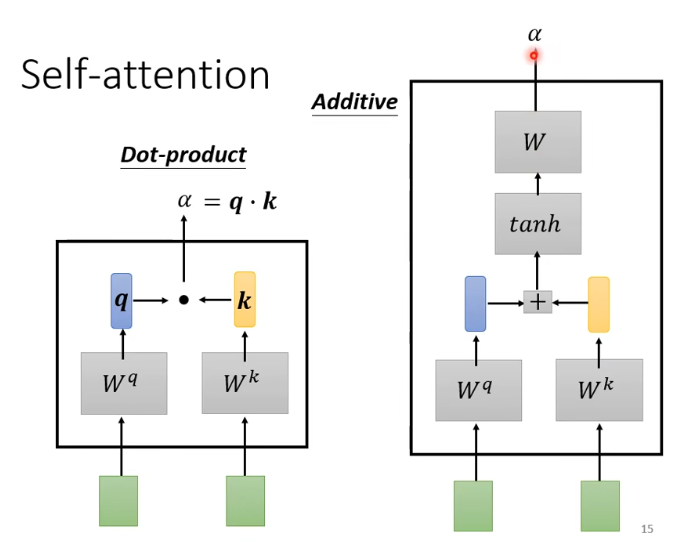

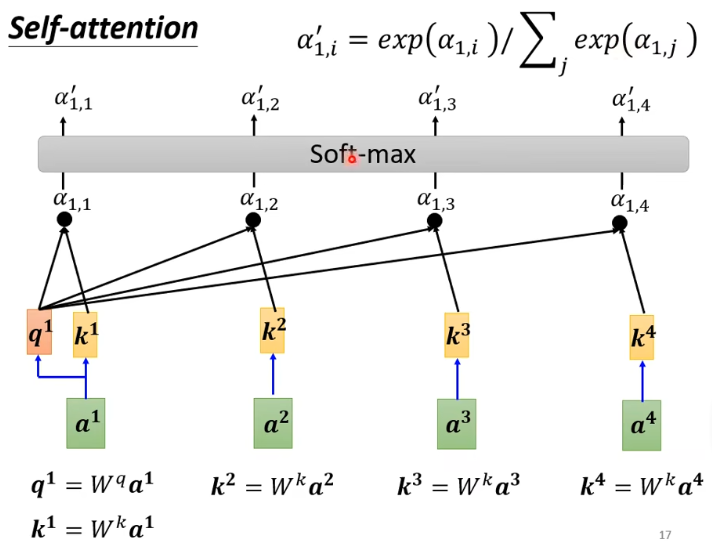

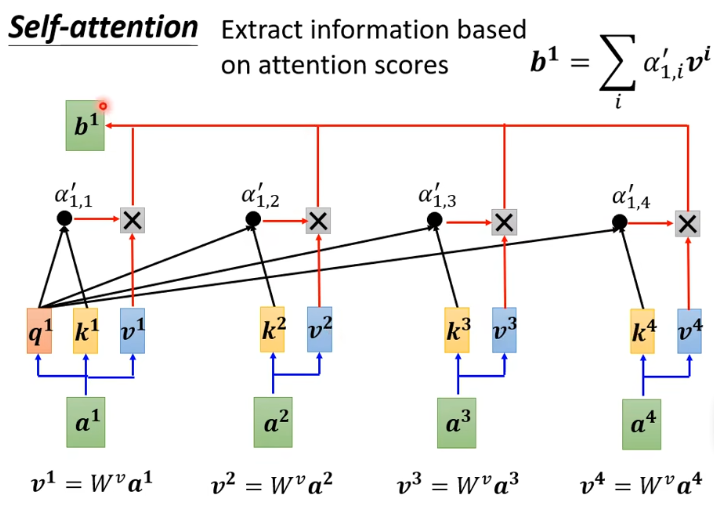

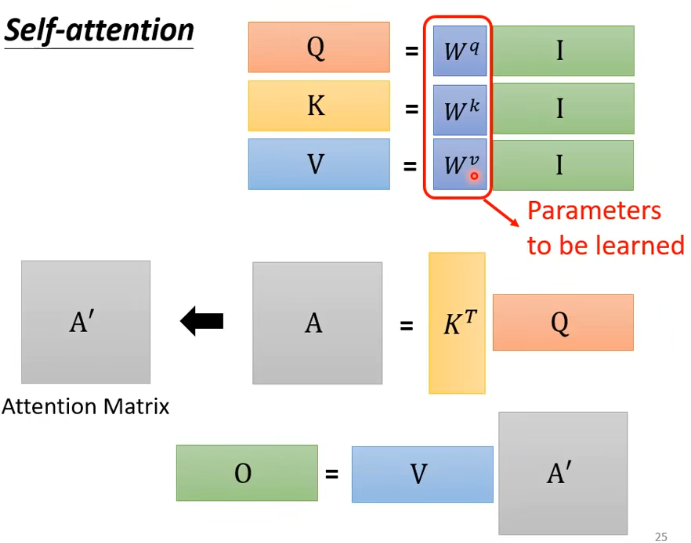

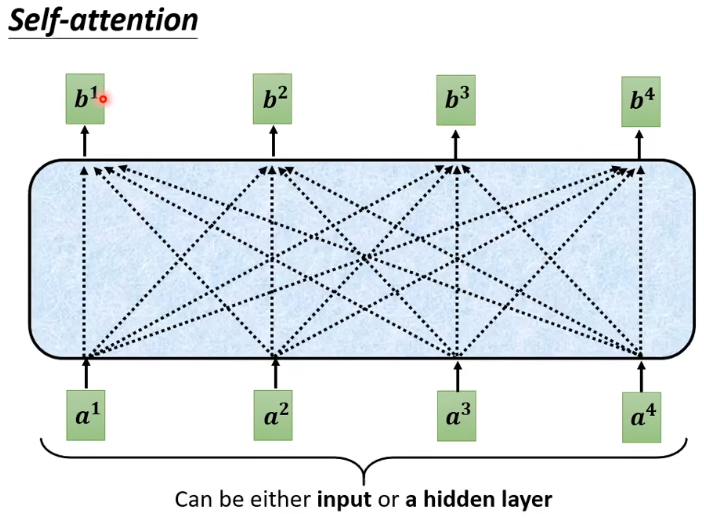

[自注意力机制和Transformer详解！](https://www.bilibili.com/video/BV1v3411r78R/)

不同的head学习不同的相关度
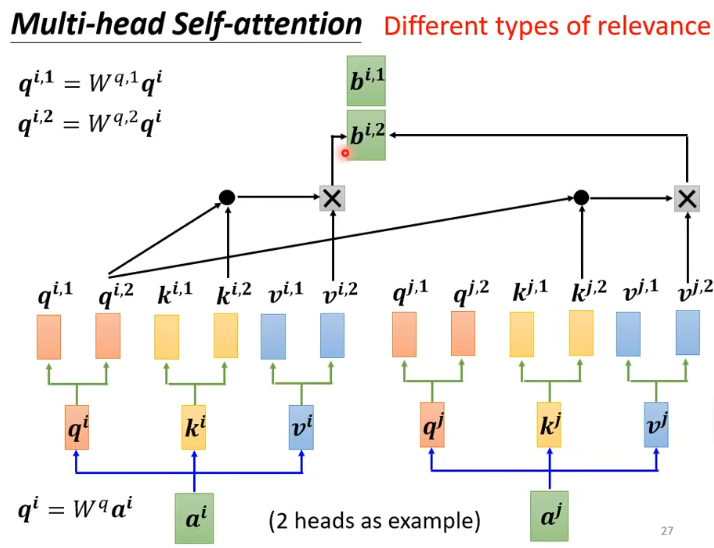

positional encoding 可以是人工设定，也可以是从数据中学习，在attention is all you need论文中是人工设定的，如下所示。
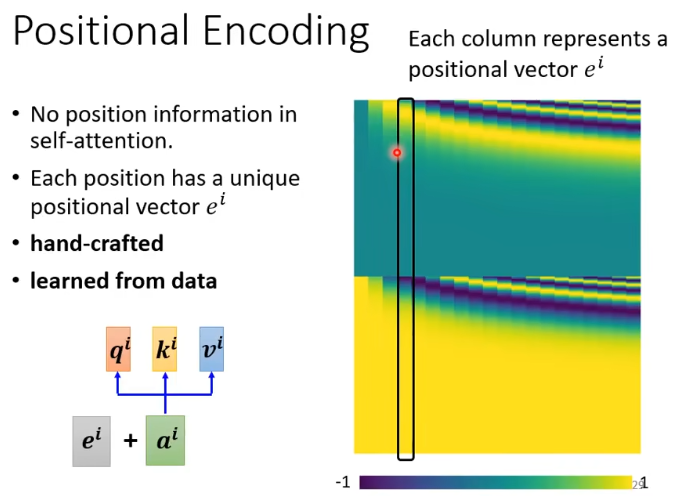

In [29]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
# dot-product 得到两两词向量的相似度 把它命名为 attention score
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril == 0, float('-inf')) # Masked Self-Attention
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v

out.shape

torch.Size([4, 8, 16])

In [30]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

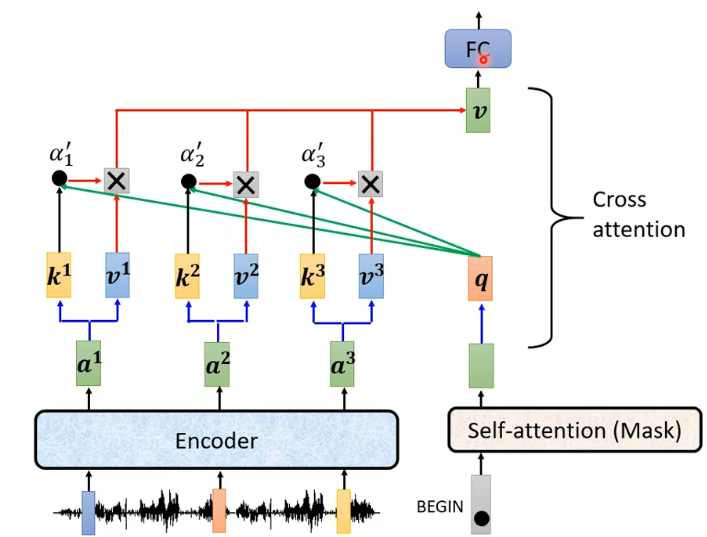

In [31]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [32]:
k.var()

tensor(1.0449)

In [33]:
q.var()

tensor(1.0700)

In [34]:
wei.var()

tensor(1.0918)

In [35]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [36]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [37]:
class LayerNorm1d: # (used to be BatchNorm1d)
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [38]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [39]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

## Full finished code, for reference

You may want to refer directly to the git repo instead though.

In [40]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [41]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

In [42]:
torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# with open('input.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

with open('train.txt', 'r') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [43]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [44]:
# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [45]:
model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

0.818867 M parameters
step 0: train loss 8.6883, val loss 8.6897
step 100: train loss 5.7465, val loss 5.6634
step 200: train loss 5.4343, val loss 5.3175
step 300: train loss 5.1328, val loss 5.0560
step 400: train loss 4.9166, val loss 4.8157
step 500: train loss 4.7130, val loss 4.6513
step 600: train loss 4.6224, val loss 4.5712
step 700: train loss 4.5177, val loss 4.4933
step 800: train loss 4.4648, val loss 4.4010
step 900: train loss 4.3657, val loss 4.3339
step 1000: train loss 4.3075, val loss 4.2848
step 1100: train loss 4.2429, val loss 4.2717
step 1200: train loss 4.1884, val loss 4.1887
step 1300: train loss 4.1836, val loss 4.1593
step 1400: train loss 4.1311, val loss 4.1104
step 1500: train loss 4.0901, val loss 4.1082
step 1600: train loss 4.0685, val loss 4.0715
step 1700: train loss 4.0631, val loss 4.0825
step 1800: train loss 4.0329, val loss 4.0489
step 1900: train loss 3.9690, val loss 3.9966
step 2000: train loss 3.9564, val loss 4.0078
step 2100: train loss 3.